In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path_to_csv = '/content/drive/MyDrive/diabetes(1).csv'

In [12]:
import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
loss, accuracy = my_first_nn.evaluate(X_test, Y_test)
print('Loss:', loss)
print('Accuracy:',accuracy)

Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 14.4002 - acc: 0.3576
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 4.2553 - acc: 0.5208
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 2.5111 - acc: 0.6615
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 1.8484 - acc: 0.6094
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 1.6477 - acc: 0.6042
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4231 - acc: 0.5955
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 1.2509 - acc: 0.6094
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 1.1192 - acc: 0.6059
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 1.0268 - acc: 0.6285
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.9605 - acc: 0.6198
Epoch 11/100
18/18 [==============================] - 0s 4

In [ ]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
import numpy as np

# load dataset
dataset = pd.read_csv(path_to_csv, header=None).values
#split the dataset with training and testing
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.1, random_state=30)

np.random.seed(155)

my_first_nn = Sequential()
my_first_nn.add(Dense(64, activation='relu', input_shape=(8,))) #   Hidden Layer
my_first_nn.add(Dense(8, activation='relu'))  # hidden layer

my_first_nn.add(Dense(64, activation='relu'))  #hidden layer

my_first_nn.add(Dense(1, activation='sigmoid'))

my_first_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
my_first_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

loss, accuracy = my_first_nn.evaluate(X_test, Y_test)
print('Loss:', loss)
print('Accuracy:',accuracy)

Epoch 1/100
22/22 [==============================] - 4s 4ms/step - loss: 0.4294 - accuracy: 0.5094
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2536 - accuracy: 0.6483
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 0.2249 - accuracy: 0.6527
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 0.2185 - accuracy: 0.6715
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 0.2261 - accuracy: 0.6686
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 0.2147 - accuracy: 0.6889
Epoch 7/100
22/22 [==============================] - 0s 6ms/step - loss: 0.2085 - accuracy: 0.6831
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2153 - accuracy: 0.6845
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2183 - accuracy: 0.6744
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.2063 - accuracy: 0.6918
Epoch 11/

In [3]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))  # Hidden layer
model.add(Dense(512, activation='relu'))  #Hidden layer
model.add(Dense(30, activation='sigmoid')) #Hidden layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 1s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 5ms/step - loss: 0.6201 - accuracy: 0.8686 - val_loss: 0.2587 - val_accuracy: 0.9403
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1755 - accuracy: 0.9565 - val_loss: 0.1367 - val_accuracy: 0.9649
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0992 - accuracy: 0.9732 - val_loss: 0.1204 - val_accuracy: 0.9661
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0665 - accuracy: 0.9818 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0494 - accuracy: 0.9861 - val_loss: 0.0911 - val_accuracy: 0.9741
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.0736 - val_accuracy: 0.9785
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - lo

In [6]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))  # Hidden layer
model.add(Dense(512, activation='relu'))  #Hidden layer
model.add(Dense(30, activation='sigmoid')) #Hidden layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 2s 5ms/step - loss: 1.0116 - accuracy: 0.7610 - val_loss: 0.4758 - val_accuracy: 0.8967
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.3192 - accuracy: 0.9235 - val_loss: 0.2526 - val_accuracy: 0.9362
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2292 - accuracy: 0.9390 - val_loss: 0.2023 - val_accuracy: 0.9449
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1995 - accuracy: 0.9466 - val_loss: 0.1851 - val_accuracy: 0.9503
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1830 - accuracy: 0.9498 - val_loss: 0.1856 - val_accuracy: 0.9498
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1712 - accuracy: 0.9537 - val_loss: 0.1720 - val_accuracy: 0.9553
Epoch 7/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1704 - accuracy: 0.9537 - val_loss: 0.1840 - val_accuracy: 

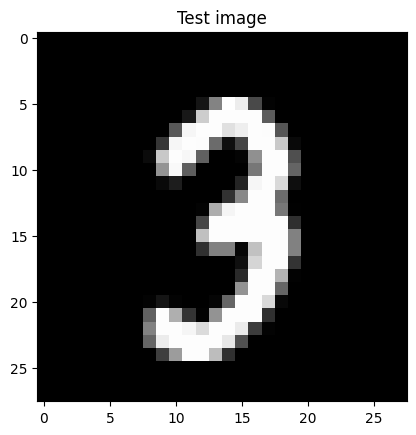

1/1 [==============================] - 0s 17ms/step
Predicted class: 3


In [5]:
import matplotlib.pyplot as plt

# select a random image from the test data
test_image_index = np.random.randint(0, len(test_data))
test_image = test_data[test_image_index]

# reshape the image to its original shape
test_image = test_image.reshape((28, 28))

# plot the image
plt.imshow(test_image, cmap='gray')
plt.title('Test image')
plt.show()
# make a prediction on the test image
prediction = model.predict(test_image.reshape((1, dimData)))

# get the predicted class label
predicted_class = np.argmax(prediction)

# print the predicted class label
print('Predicted class:', predicted_class)

import matplotlib.pyplot as plt

# select a random image from the test data
test_image_index = np.random.randint(0, len(test_data))
test_image = test_data[test_image_index]

# reshape the image to its original shape
test_image = test_image.reshape((28, 28))


